# Installation of Packages in Conda

To install the required packages in your conda environment, you can use the following commands:

```bash
conda install h5py
conda install pytables


# Requirements

In [5]:
import os
import sys

project_root = os.path.abspath(os.path.join(os.getcwd(), "../../.."))
sys.path.append(project_root)

from examples.mia.LOS.utils.data_processing import get_mimic_dataset, get_mimic_dataloaders
from examples.mia.LOS.utils.model import MimicLR, create_trained_model_and_metadata




In [6]:

# Generate the dataset and dataloaders
path = os.path.join(os.getcwd(), "data/")

dataset, train_indices, test_indices= get_mimic_dataset(path, train_frac = 0.5, test_frac= 0.2)

In [9]:

train_loader, test_loader= get_mimic_dataloaders(dataset, train_indices, test_indices, batch_size=128)

Train indices type: <class 'str'>, First few indices: train
Test indices type: <class 'str'>, First few indices: test_


In [8]:
n_features = dataset.x.shape[1]
print(f"Number of features: {n_features}")

# Train the model
if not os.path.exists("target"):
    os.makedirs("target")
model = MimicLR(n_features)
train_acc, train_loss, test_acc, test_loss = create_trained_model_and_metadata(model, 
                                                                               train_loader, 
                                                                               test_loader, 
                                                                               lr = 0.0001,
                                                                                weight_decay = 5.392,
                                                                               epochs=5)




Number of features: 7488


Training Progress:   0%|          | 0/5 [56:52<?, ?it/s]


TypeError: new(): invalid data type 'str'

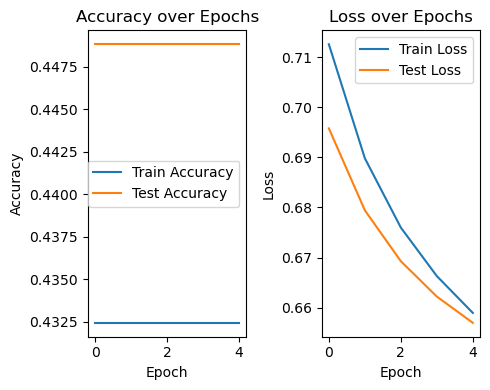

In [5]:
import matplotlib.pyplot as plt

# Plot training and test accuracy
plt.figure(figsize=(5, 4))

plt.subplot(1, 2, 1)
plt.plot(train_acc, label='Train Accuracy')
plt.plot(test_acc, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()

# Plot training and test loss
plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Train Loss')
plt.plot(test_loss, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()

plt.tight_layout()
plt.show()

In [7]:
from mimic_handler import MimicInputHandler

from leakpro import LeakPro

# Read the config file
config_path = "audit.yaml"

# Prepare leakpro object
leakpro = LeakPro(MimicInputHandler, config_path)

# Run the audit 
leakpro.run_audit()

2024-10-16 13:44:29,994 INFO     Target model blueprint created from MimicLR in utils/model.py.
2024-10-16 13:44:30,049 INFO     Loaded target model metadata from ./target/model_metadata.pkl
2024-10-16 13:44:30,052 INFO     Loaded target model from ./target
2024-10-16 13:44:30,504 INFO     Loaded population dataset from ./data/dataset.pkl
2024-10-16 13:44:30,504 INFO     Loaded population dataset from ./data/dataset.pkl
2024-10-16 13:44:30,505 INFO     Configuring the Population attack
2024-10-16 13:44:30,506 INFO     Added attack: population
2024-10-16 13:44:30,507 INFO     Preparing attack: population
2024-10-16 13:44:30,507 INFO     Preparing attack data for training the Population attack
2024-10-16 13:44:30,510 INFO     Subsampling attack data from 7184 points
2024-10-16 13:44:30,511 INFO     Number of attack data points after subsampling: 7184
2024-10-16 13:44:30,511 INFO     Computing signals for the Population attack


TypeError: expected np.ndarray (got Tensor)